# Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles

### Objective: Predicting the likely hood of each customer becoming inactive for 90 days, i.e churning.

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Importation

In [2]:
df = pd.read_csv('Train-2.csv', index_col = 'user_id')
df.head()
df_ml = df.copy()

In [3]:
df_1 = df.copy()

# Data Variables/Information

In [4]:
# The churn dataset includes 19 variables including 15 numeric variables and 04 categorical variables.
# user_id; Customer ID
# REGION; The location of each client
# TENURE; Duration in the network
# MONTANT; Top-up amount
# FREQUENCE_RECH; Number of times the customer refilled
# REVENUE; Monthly income of each client
# ARPU_SEGMENT; Income over 90 days / 3
# FREQUENCE; Number of times the client has made an income
# DATA_VOLUME; Number of connections
# ON_NET; Inter expresso call
# ORANGE; Call to orange
# TIGO; Call to Tigo
# ZONE1; Call to zones1
# ZONE2; Call to zones2
# MRG; A client who is going
# REGULARITY; Number of times the client is active for 90 days
# TOP_PACK; The most active packs
# FREQ_TOP_PACK; Number of times the client has activated the top pack packages
# CHURN; Variable to predict - Target; 0 means No, 1 means Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063 to a80e3a164986e489102cfb538fa62e16ecc28adf
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          242480 non-null  object 
 1   TENURE          400000 non-null  object 
 2   MONTANT         259723 non-null  float64
 3   FREQUENCE_RECH  259723 non-null  float64
 4   REVENUE         265337 non-null  float64
 5   ARPU_SEGMENT    265337 non-null  float64
 6   FREQUENCE       265337 non-null  float64
 7   DATA_VOLUME     203146 non-null  float64
 8   ON_NET          254181 non-null  float64
 9   ORANGE          233683 non-null  float64
 10  TIGO            160614 non-null  float64
 11  ZONE1           31690 non-null   float64
 12  ZONE2           25513 non-null   float64
 13  MRG             400000 non-null  object 
 14  REGULARITY      400000 non-null  int64  
 15  TOP_PACK        232671 non-null  o

In [6]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [7]:
df.shape

(400000, 18)

In [8]:
df.duplicated().sum()

111788

In [9]:
df.isnull().sum()

REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

# Data Visualization

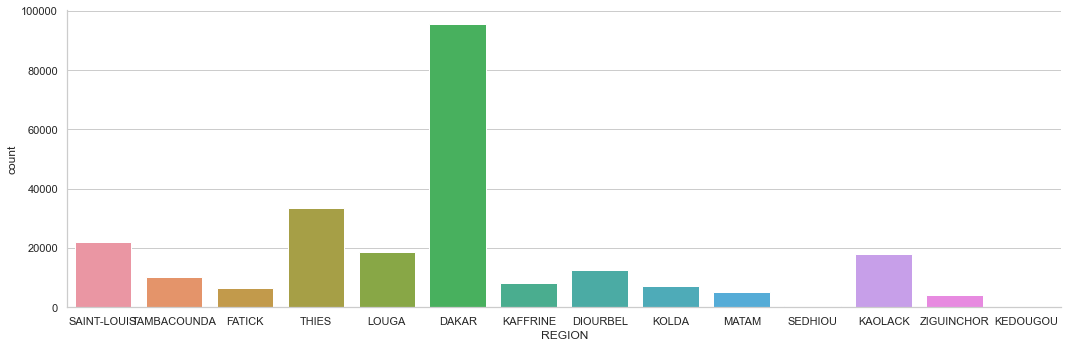

In [10]:
sns.set_theme(style = 'whitegrid', font_scale = 1)
sns.catplot(data = df, x = 'REGION', kind = 'count', height = 5, aspect = 3)

In [11]:
# Dakar was by far, the city with the most customers
# Thies in a distant second,Saint-louis third.

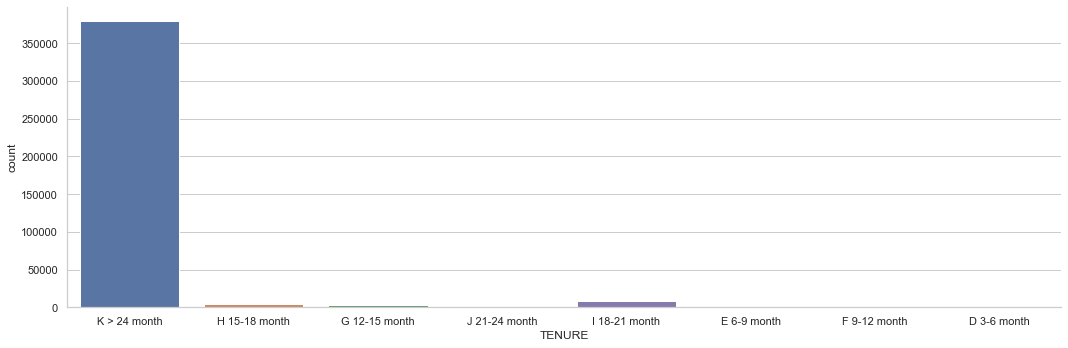

In [12]:
sns.set_theme(style = 'whitegrid', font_scale = 1)
sns.catplot(data = df, x = 'TENURE', kind = 'count', height = 5, aspect = 3)

In [13]:
# A bulk majority, almost 400000 customers have been subscribed to the network for 24 months and above.

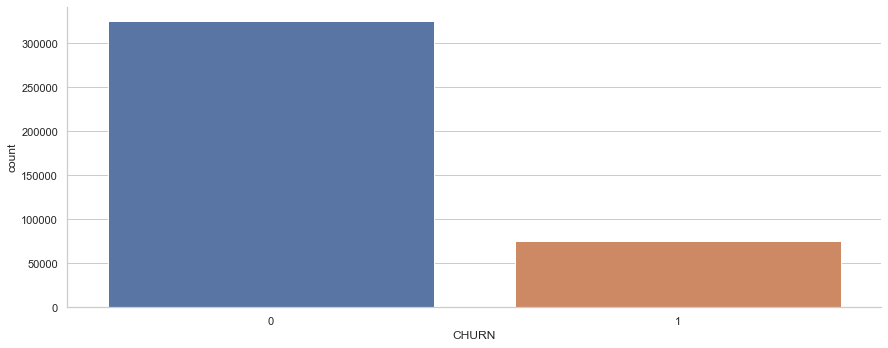

In [14]:
sns.set_theme(style = 'whitegrid', font_scale = 1)
sns.catplot(data = df, x = 'CHURN', kind = 'count', height = 5, aspect = 2.5)

In [15]:
# Customer retention was high.

#### Stripplots show relationships between two variables

##### From the following plots, we can possibly predict customers who are likely to churn and why.

<AxesSubplot:xlabel='CHURN', ylabel='MONTANT'>

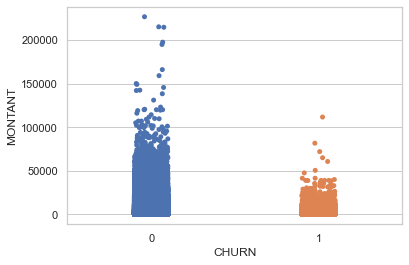

In [16]:
sns.stripplot(data = df, x = 'CHURN', y = 'MONTANT')

<AxesSubplot:xlabel='CHURN', ylabel='FREQUENCE_RECH'>

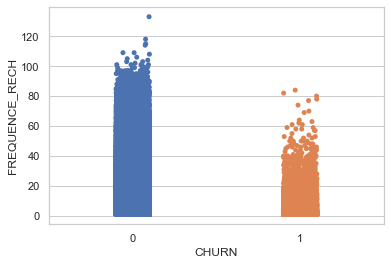

In [17]:
sns.stripplot(data = df, x = 'CHURN', y = 'FREQUENCE_RECH')

<AxesSubplot:xlabel='CHURN', ylabel='REVENUE'>

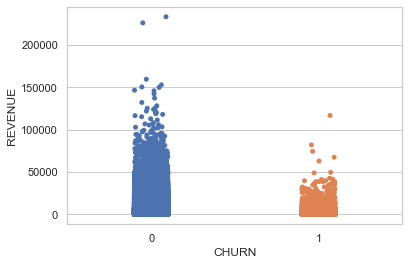

In [18]:
sns.stripplot(data = df, x = 'CHURN', y = 'REVENUE')

<AxesSubplot:xlabel='CHURN', ylabel='ARPU_SEGMENT'>

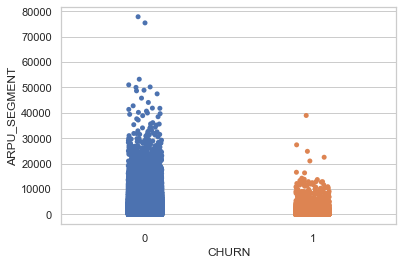

In [19]:
sns.stripplot(data = df, x = 'CHURN', y = 'ARPU_SEGMENT')

<AxesSubplot:xlabel='CHURN', ylabel='FREQUENCE'>

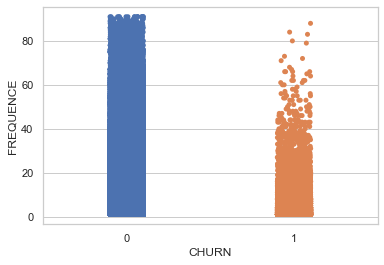

In [20]:
sns.stripplot(data = df, x = 'CHURN', y = 'FREQUENCE')

<AxesSubplot:xlabel='CHURN', ylabel='DATA_VOLUME'>

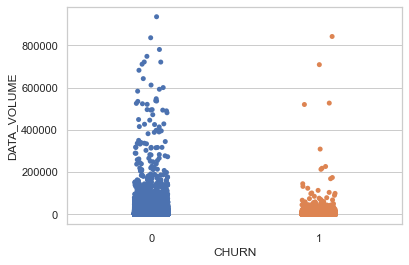

In [21]:
sns.stripplot(data = df, x = 'CHURN', y = 'DATA_VOLUME')

<AxesSubplot:xlabel='CHURN', ylabel='ON_NET'>

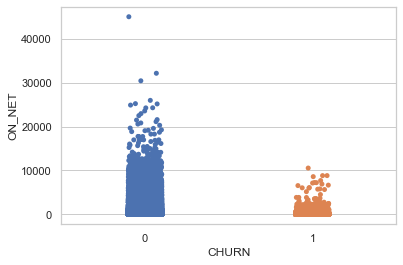

In [22]:
sns.stripplot(data = df, x = 'CHURN', y = 'ON_NET')

<AxesSubplot:xlabel='CHURN', ylabel='ORANGE'>

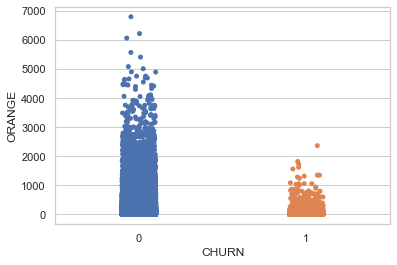

In [23]:
sns.stripplot(data = df, x = 'CHURN', y = 'ORANGE')

<AxesSubplot:xlabel='CHURN', ylabel='TIGO'>

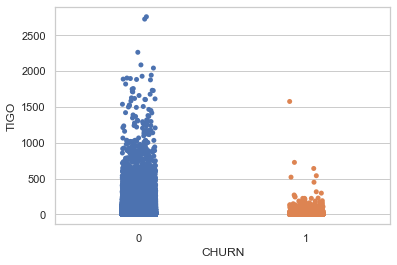

In [24]:
sns.stripplot(data = df, x = 'CHURN', y = 'TIGO')

<AxesSubplot:xlabel='CHURN', ylabel='ZONE1'>

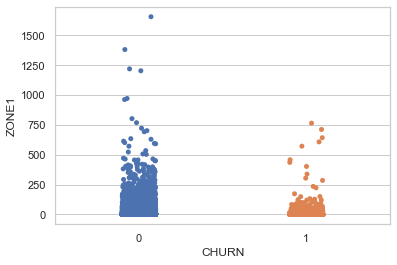

In [25]:
sns.stripplot(data = df, x = 'CHURN', y = 'ZONE1')

<AxesSubplot:xlabel='CHURN', ylabel='ZONE2'>

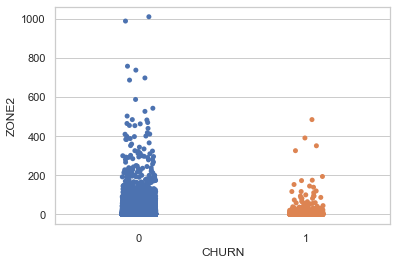

In [26]:
sns.stripplot(data = df, x = 'CHURN', y = 'ZONE2')

<AxesSubplot:xlabel='CHURN', ylabel='REGULARITY'>

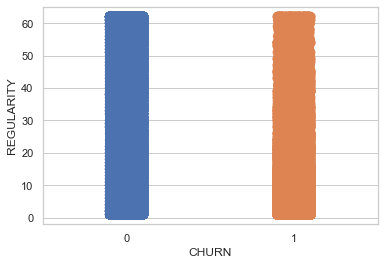

In [27]:
sns.stripplot(data = df, x = 'CHURN', y = 'REGULARITY', size = 10)

# Test Run

In [28]:
# df_1 = df.dropna()
df_1.dropna(inplace = True)

In [29]:
df_1.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
user_id,,,,,,,,,,,,,,,,,,
e32b4d6132ff45789b023165cfac5fd71a959727,DAKAR,K > 24 month,14650.0,35.0,15507.0,5169.0,40.0,8743.0,29.0,63.0,2.0,9.0,1.0,NO,62,IVR Echat_Daily_50F,19.0,0
5013300a472c15643f6866876293000800cee62f,KAFFRINE,K > 24 month,4950.0,16.0,4962.0,1654.0,21.0,0.0,67.0,73.0,3.0,2.0,3.0,NO,30,Mixt 250F=Unlimited_call24H,5.0,0
771522f0a275a05d2046b2c93eb299402289f4aa,DAKAR,K > 24 month,6350.0,16.0,6337.0,2112.0,19.0,10252.0,7.0,3.0,9.0,1.0,0.0,NO,54,"Data:490F=1GB,7d",7.0,0
b41ce03b52f2d841f33bdd8a1cbd89bdaefb71ac,SAINT-LOUIS,K > 24 month,3750.0,12.0,3847.0,1282.0,18.0,998.0,12.0,32.0,2.0,0.0,5.0,NO,54,"Data: 100 F=40MB,24H",2.0,0
6bfaf8a3fc1d74cffee41d59595476f3ae10ad4b,LOUGA,K > 24 month,15000.0,2.0,13969.0,4656.0,29.0,5709.0,295.0,164.0,47.0,2.0,0.0,NO,62,Twter_U2opia_Weekly,11.0,0


In [30]:
df_1.shape

(2074, 18)

## Data Modelling/Training

In [31]:
#creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
df_1['MRG'] = le.fit_transform(df_1['MRG'])

In [32]:
REGION = pd.get_dummies(df_1['REGION'], drop_first = False)

In [33]:
TENURE = pd.get_dummies(df_1['TENURE'], drop_first = False)

In [34]:
TOP_PACK = pd.get_dummies(df_1['TOP_PACK'], drop_first = False)

In [35]:
df_1.drop(['REGION'], axis = 1, inplace = True)
df_1.drop(['TENURE'], axis = 1, inplace = True)
df_1.drop(['TOP_PACK'], axis = 1, inplace = True)

In [36]:
df_1 = pd.concat([df_1, REGION, TENURE, TOP_PACK], axis = 1)
df_1.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,...,On-net 200F=60mn;1d,"On-net 500=4000,10d",On-net 500F_FNF;3d,Pilot_Youth1_290,Pilot_Youth4_490,Twter_U2opia_Daily,Twter_U2opia_Monthly,Twter_U2opia_Weekly,VAS(IVR_Radio_Daily),Yewouleen_PKG
user_id,,,,,,,,,,,,,,,,,,,,,
e32b4d6132ff45789b023165cfac5fd71a959727,14650.0,35.0,15507.0,5169.0,40.0,8743.0,29.0,63.0,2.0,9.0,...,0,0,0,0,0,0,0,0,0,0
5013300a472c15643f6866876293000800cee62f,4950.0,16.0,4962.0,1654.0,21.0,0.0,67.0,73.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
771522f0a275a05d2046b2c93eb299402289f4aa,6350.0,16.0,6337.0,2112.0,19.0,10252.0,7.0,3.0,9.0,1.0,...,0,0,0,0,0,0,0,0,0,0
b41ce03b52f2d841f33bdd8a1cbd89bdaefb71ac,3750.0,12.0,3847.0,1282.0,18.0,998.0,12.0,32.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6bfaf8a3fc1d74cffee41d59595476f3ae10ad4b,15000.0,2.0,13969.0,4656.0,29.0,5709.0,295.0,164.0,47.0,2.0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2074 entries, e32b4d6132ff45789b023165cfac5fd71a959727 to 17186be41c2717550fddfd24e441f7dfb44b407b
Data columns (total 89 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   MONTANT                                     2074 non-null   float64
 1   FREQUENCE_RECH                              2074 non-null   float64
 2   REVENUE                                     2074 non-null   float64
 3   ARPU_SEGMENT                                2074 non-null   float64
 4   FREQUENCE                                   2074 non-null   float64
 5   DATA_VOLUME                                 2074 non-null   float64
 6   ON_NET                                      2074 non-null   float64
 7   ORANGE                                      2074 non-null   float64
 8   TIGO                                        2074 non-null   float64
 9   ZONE1          

C:\Users\BEST\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BEST\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:ylabel='user_id'>

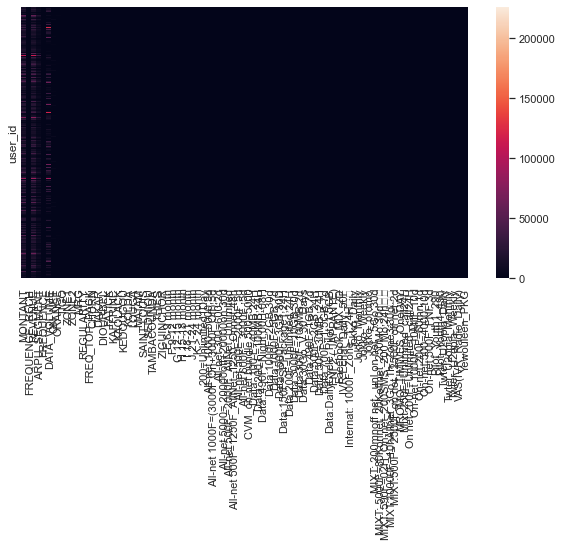

In [38]:
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_1, yticklabels = False, xticklabels = 1)

# Decision Tree Algorithm

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df_1.drop(columns=['CHURN'])
y = df_1['CHURN']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

score = accuracy_score(y_test, predictions)
score

0.9967897271268058

# Data Cleaning

In [40]:
df_ml = df.dropna(thresh = 10, axis = 0)
df_ml.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
user_id,,,,,,,,,,,,,,,,,,
dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [41]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258518 entries, dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063 to 767f596aee426962f7d92f4de8d7b232cdc17568
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   REGION          204714 non-null  object 
 1   TENURE          258518 non-null  object 
 2   MONTANT         255053 non-null  float64
 3   FREQUENCE_RECH  255053 non-null  float64
 4   REVENUE         258315 non-null  float64
 5   ARPU_SEGMENT    258315 non-null  float64
 6   FREQUENCE       258315 non-null  float64
 7   DATA_VOLUME     175406 non-null  float64
 8   ON_NET          232419 non-null  float64
 9   ORANGE          229980 non-null  float64
 10  TIGO            159236 non-null  float64
 11  ZONE1           30522 non-null   float64
 12  ZONE2           25424 non-null   float64
 13  MRG             258518 non-null  object 
 14  REGULARITY      258518 non-null  int64  
 15  TOP_PACK        232600 non-null  o

In [42]:
df_ml.shape

(258518, 18)

In [43]:
df_ml.isnull().sum()

REGION             53804
TENURE                 0
MONTANT             3465
FREQUENCE_RECH      3465
REVENUE              203
ARPU_SEGMENT         203
FREQUENCE            203
DATA_VOLUME        83112
ON_NET             26099
ORANGE             28538
TIGO               99282
ZONE1             227996
ZONE2             233094
MRG                    0
REGULARITY             0
TOP_PACK           25918
FREQ_TOP_PACK      25918
CHURN                  0
dtype: int64

In [44]:
df_ml.drop(['ZONE1', 'ZONE2'], axis = 1, inplace = True)

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/1885483870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.drop(['ZONE1', 'ZONE2'], axis = 1, inplace = True)


##### Dropped this columns, cause they had no effect on the prediction

# DATA FILLING

### I used Histograms and Box plots to point out the outliers 

#### If the outliers were much and the box was somewhat negligble I normalized using the Min-Max method. 
#### If they were less outliers, I used the simple scaling feature   

(array([2.47206e+05, 7.06900e+03, 6.10000e+02, 1.13000e+02, 3.20000e+01,
        1.00000e+01, 6.00000e+00, 2.00000e+00, 2.00000e+00, 3.00000e+00]),
 array([2.00000e+01, 2.26730e+04, 4.53260e+04, 6.79790e+04, 9.06320e+04,
        1.13285e+05, 1.35938e+05, 1.58591e+05, 1.81244e+05, 2.03897e+05,
        2.26550e+05]),
 <BarContainer object of 10 artists>)

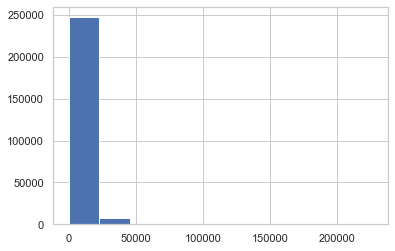

In [45]:
plt.hist(x = df_ml['MONTANT'])

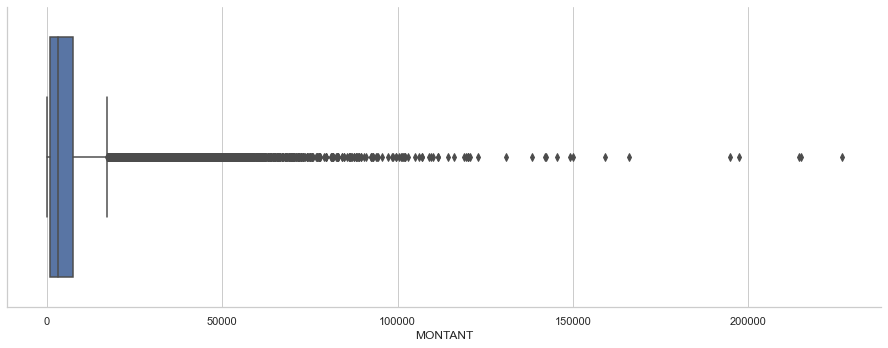

In [46]:
sns.catplot(data = df_ml, x = "MONTANT", kind = 'box', height = 5, aspect = 2.5)

In [47]:
df_ml['MONTANT'] = (df_ml['MONTANT'].min()) / (df_ml['MONTANT'].max() - df_ml['MONTANT'].min())

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/255358671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['MONTANT'] = (df_ml['MONTANT'].min()) / (df_ml['MONTANT'].max() - df_ml['MONTANT'].min())


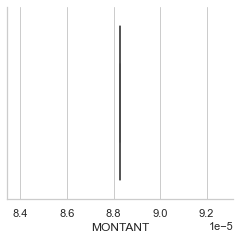

In [48]:
sns.catplot(data = df_ml, x = "MONTANT", kind = 'box', height = 3.5)

(array([1.85235e+05, 4.12390e+04, 1.62290e+04, 7.22500e+03, 3.30500e+03,
        1.41600e+03, 3.51000e+02, 4.60000e+01, 6.00000e+00, 1.00000e+00]),
 array([  1. ,  14.2,  27.4,  40.6,  53.8,  67. ,  80.2,  93.4, 106.6,
        119.8, 133. ]),
 <BarContainer object of 10 artists>)

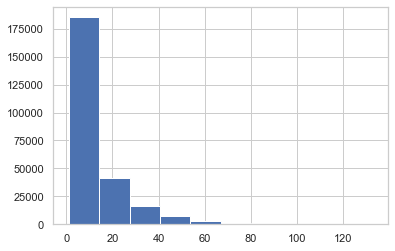

In [49]:
plt.hist(x = df_ml['FREQUENCE_RECH'])

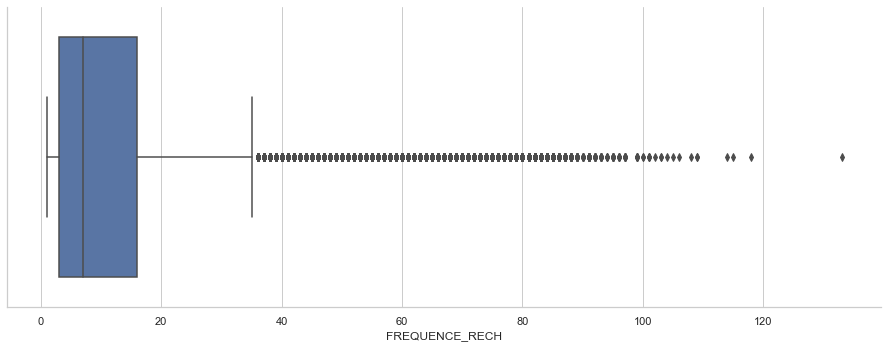

In [50]:
sns.catplot(data = df_ml, x = "FREQUENCE_RECH", kind = 'box', height = 5, aspect = 2.5)

In [51]:
df_ml['FREQUENCE_RECH'] = df_ml['FREQUENCE_RECH'] / df_ml['FREQUENCE_RECH'].max()

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/71073783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['FREQUENCE_RECH'] = df_ml['FREQUENCE_RECH'] / df_ml['FREQUENCE_RECH'].max()


In [52]:
df_ml['FREQUENCE_RECH'] = df_ml['FREQUENCE_RECH'].fillna(df_ml['FREQUENCE_RECH'].mean())

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/532287079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['FREQUENCE_RECH'] = df_ml['FREQUENCE_RECH'].fillna(df_ml['FREQUENCE_RECH'].mean())


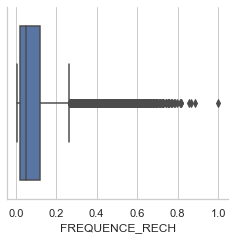

In [53]:
sns.catplot(data = df_ml, x = "FREQUENCE_RECH", kind = 'box', height = 3.5)

(array([2.50606e+05, 6.95300e+03, 5.99000e+02, 1.09000e+02, 2.70000e+01,
        1.20000e+01, 7.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([1.000000e+00, 2.334220e+04, 4.668340e+04, 7.002460e+04,
        9.336580e+04, 1.167070e+05, 1.400482e+05, 1.633894e+05,
        1.867306e+05, 2.100718e+05, 2.334130e+05]),
 <BarContainer object of 10 artists>)

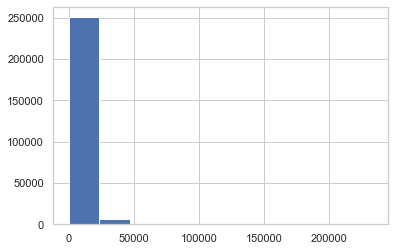

In [54]:
plt.hist(x = df_ml['REVENUE'])

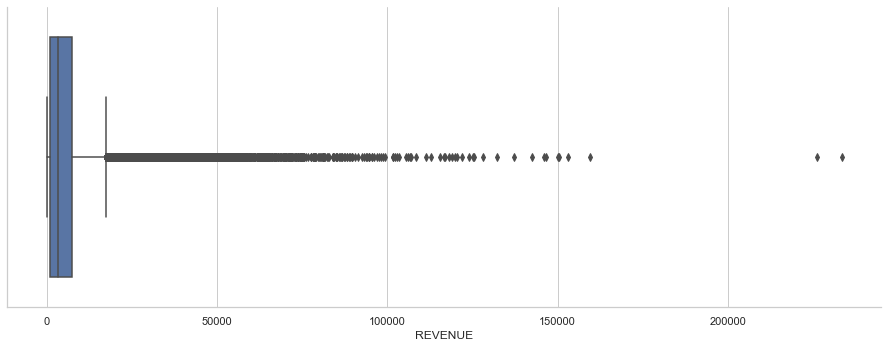

In [55]:
sns.catplot(data = df_ml, x = 'REVENUE', kind = 'box', height = 5, aspect = 2.5)

In [56]:
df_ml['REVENUE'] = (df_ml['REVENUE'].min()) / (df_ml['REVENUE'].max() - df_ml['REVENUE'].min())

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/1660951166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['REVENUE'] = (df_ml['REVENUE'].min()) / (df_ml['REVENUE'].max() - df_ml['REVENUE'].min())


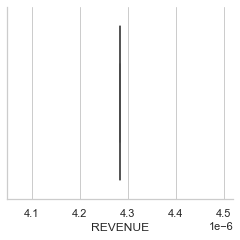

In [57]:
sns.catplot(data = df_ml, x = 'REVENUE', kind = 'box', height = 3.5)

(array([2.50606e+05, 6.95300e+03, 5.99000e+02, 1.09000e+02, 2.70000e+01,
        1.20000e+01, 7.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([    0. ,  7780.4, 15560.8, 23341.2, 31121.6, 38902. , 46682.4,
        54462.8, 62243.2, 70023.6, 77804. ]),
 <BarContainer object of 10 artists>)

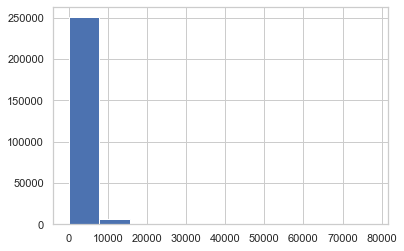

In [58]:
plt.hist(x = df_ml['ARPU_SEGMENT'])

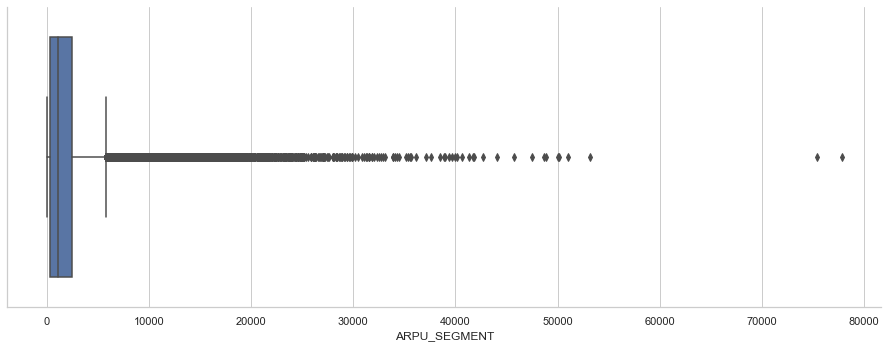

In [59]:
sns.catplot(data = df_ml, x = 'ARPU_SEGMENT', kind = 'box', height = 5, aspect = 2.5)

In [60]:
df_ml['ARPU_SEGMENT'] = (df_ml['ARPU_SEGMENT'].min()) / (df_ml['ARPU_SEGMENT'].max() - df_ml['ARPU_SEGMENT'].min())

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/4194445149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['ARPU_SEGMENT'] = (df_ml['ARPU_SEGMENT'].min()) / (df_ml['ARPU_SEGMENT'].max() - df_ml['ARPU_SEGMENT'].min())


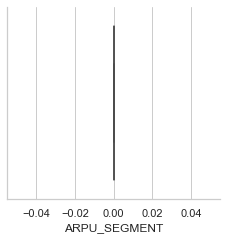

In [61]:
sns.catplot(data = df_ml, x = 'ARPU_SEGMENT', kind = 'box', height = 3.5)

(array([132415.,  55403.,  30266.,  17293.,   9974.,   5834.,   3565.,
          2075.,   1045.,    445.]),
 array([ 1., 10., 19., 28., 37., 46., 55., 64., 73., 82., 91.]),
 <BarContainer object of 10 artists>)

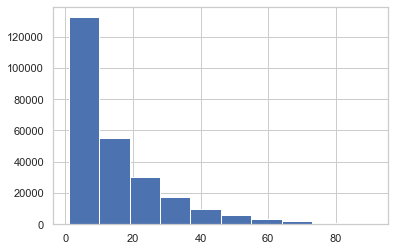

In [62]:
plt.hist(x = df_ml['FREQUENCE'])

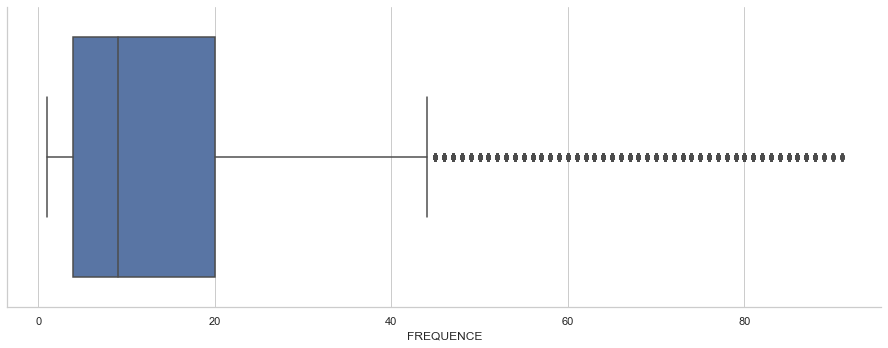

In [63]:
sns.catplot(data = df_ml, x = 'FREQUENCE', kind = 'box', height = 5, aspect = 2.5)

In [64]:
df_ml['FREQUENCE'] = df_ml['FREQUENCE'] / df_ml['FREQUENCE'].max()

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/3881676762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['FREQUENCE'] = df_ml['FREQUENCE'] / df_ml['FREQUENCE'].max()


In [65]:
df_ml['FREQUENCE'] = df_ml['FREQUENCE'].fillna(df_ml['FREQUENCE'].mean())

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/632274045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['FREQUENCE'] = df_ml['FREQUENCE'].fillna(df_ml['FREQUENCE'].mean())


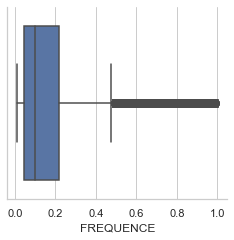

In [66]:
sns.catplot(data = df_ml, x = 'FREQUENCE', kind = 'box', height = 3.5)

(array([1.75152e+05, 1.66000e+02, 3.00000e+01, 1.90000e+01, 1.20000e+01,
        1.30000e+01, 5.00000e+00, 5.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([     0. ,  93457.6, 186915.2, 280372.8, 373830.4, 467288. ,
        560745.6, 654203.2, 747660.8, 841118.4, 934576. ]),
 <BarContainer object of 10 artists>)

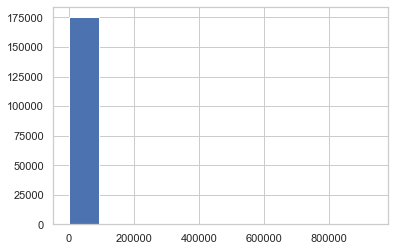

In [67]:
plt.hist(x =df_ml['DATA_VOLUME'])

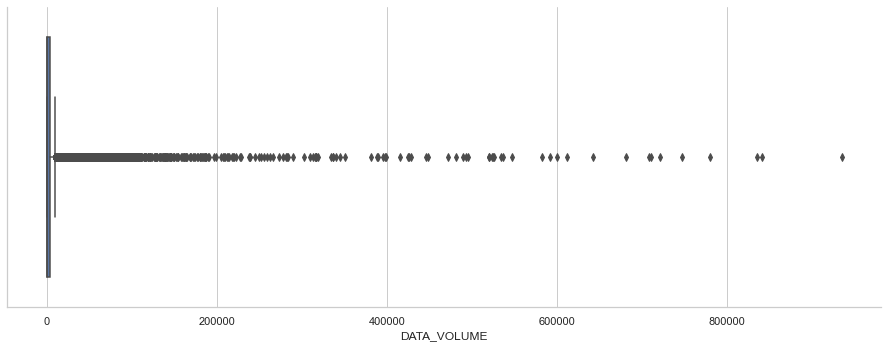

In [68]:
sns.catplot(data = df_ml, x = 'DATA_VOLUME', kind = 'box', height = 5, aspect = 2.5)

In [69]:
df_ml['DATA_VOLUME'] = (df_ml['DATA_VOLUME'].min()) / (df_ml['DATA_VOLUME'].max() - df_ml['DATA_VOLUME'].min())

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/861836724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['DATA_VOLUME'] = (df_ml['DATA_VOLUME'].min()) / (df_ml['DATA_VOLUME'].max() - df_ml['DATA_VOLUME'].min())


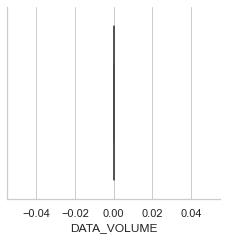

In [70]:
sns.catplot(data = df_ml, x = 'DATA_VOLUME', kind = 'box', height = 3.5)

(array([2.30102e+05, 1.96000e+03, 2.85000e+02, 4.50000e+01, 1.60000e+01,
        8.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([    0. ,  4501.1,  9002.2, 13503.3, 18004.4, 22505.5, 27006.6,
        31507.7, 36008.8, 40509.9, 45011. ]),
 <BarContainer object of 10 artists>)

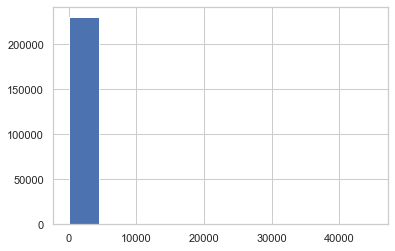

In [71]:
plt.hist(x = df_ml['ON_NET'])

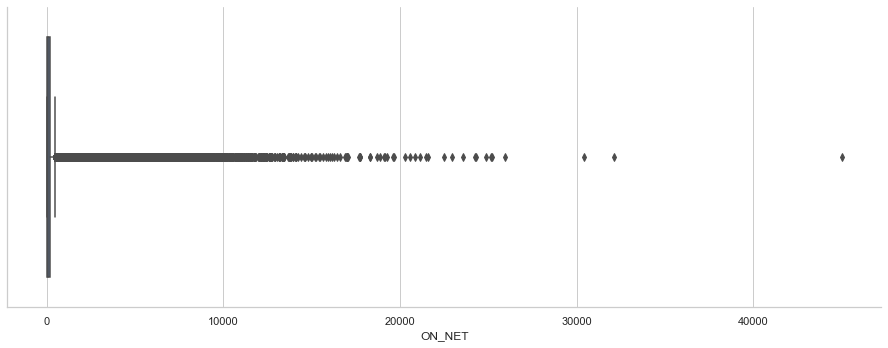

In [72]:
sns.catplot(data = df_ml, x = 'ON_NET', kind = 'box', height = 5, aspect = 2.5)

In [73]:
df_ml['ON_NET'] = (df_ml['ON_NET'].min()) / (df_ml['ON_NET'].max() - df_ml['ON_NET'].min())

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/2742473521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['ON_NET'] = (df_ml['ON_NET'].min()) / (df_ml['ON_NET'].max() - df_ml['ON_NET'].min())


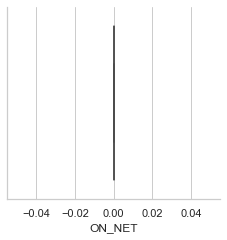

In [74]:
sns.catplot(data = df_ml, x = 'ON_NET', kind = 'box', height = 3.5)

(array([2.25618e+05, 3.34700e+03, 6.39000e+02, 2.42000e+02, 6.70000e+01,
        3.90000e+01, 1.90000e+01, 5.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([   0. ,  678.8, 1357.6, 2036.4, 2715.2, 3394. , 4072.8, 4751.6,
        5430.4, 6109.2, 6788. ]),
 <BarContainer object of 10 artists>)

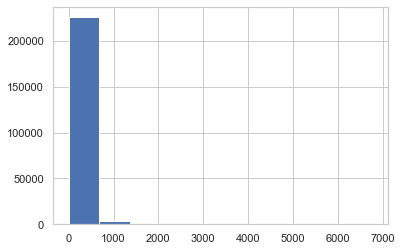

In [75]:
plt.hist(x = df_ml['ORANGE'])

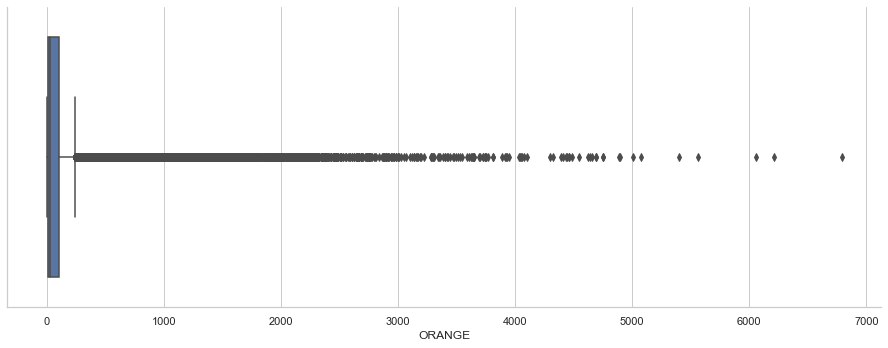

In [76]:
sns.catplot(data = df_ml, x = 'ORANGE', kind = 'box', height = 5, aspect = 2.5)

In [77]:
df_ml['ORANGE'] = (df_ml['ORANGE'].min()) / (df_ml['ORANGE'].max() - df_ml['ORANGE'].min())

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/2307315963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['ORANGE'] = (df_ml['ORANGE'].min()) / (df_ml['ORANGE'].max() - df_ml['ORANGE'].min())


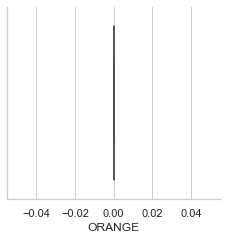

In [78]:
sns.catplot(data = df_ml, x = 'ORANGE', kind = 'box', height = 3.5)

(array([1.57803e+05, 1.08200e+03, 2.06000e+02, 7.40000e+01, 3.20000e+01,
        1.80000e+01, 1.50000e+01, 3.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([   0. ,  275.8,  551.6,  827.4, 1103.2, 1379. , 1654.8, 1930.6,
        2206.4, 2482.2, 2758. ]),
 <BarContainer object of 10 artists>)

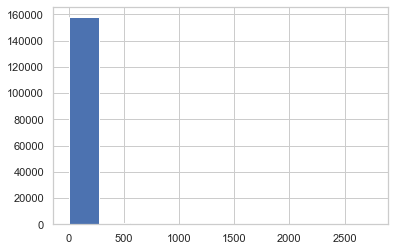

In [79]:
plt.hist(x = df_ml['TIGO'])

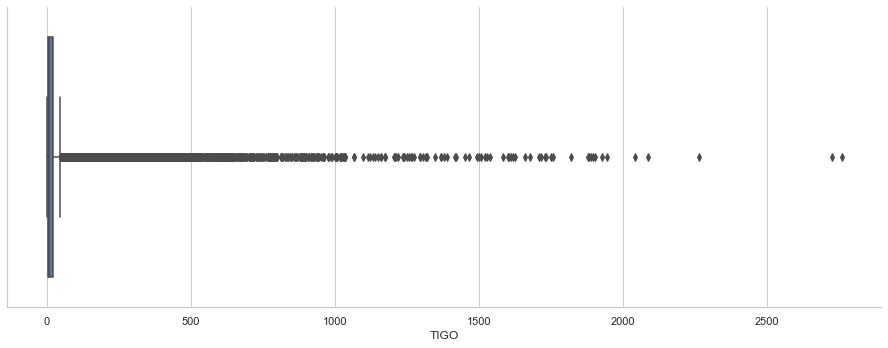

In [80]:
sns.catplot(data = df_ml, x = 'TIGO', kind = 'box', height = 5, aspect = 2.5)

In [81]:
df_ml['TIGO'] = (df_ml['TIGO'].min()) / (df_ml['TIGO'].max() - df_ml['TIGO'].min())

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/3749541910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['TIGO'] = (df_ml['TIGO'].min()) / (df_ml['TIGO'].max() - df_ml['TIGO'].min())


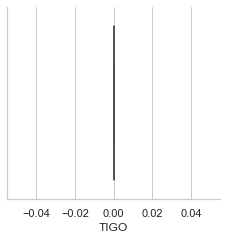

In [82]:
sns.catplot(data = df_ml, x = 'TIGO', kind = 'box', height = 3.5)

(array([2.30911e+05, 1.62100e+03, 5.30000e+01, 8.00000e+00, 4.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([  1. ,  63.8, 126.6, 189.4, 252.2, 315. , 377.8, 440.6, 503.4,
        566.2, 629. ]),
 <BarContainer object of 10 artists>)

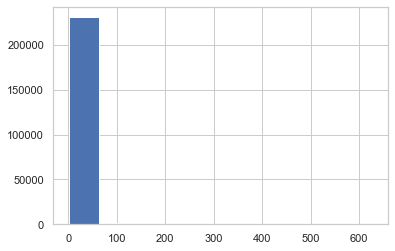

In [83]:
plt.hist(x = df_ml['FREQ_TOP_PACK'])

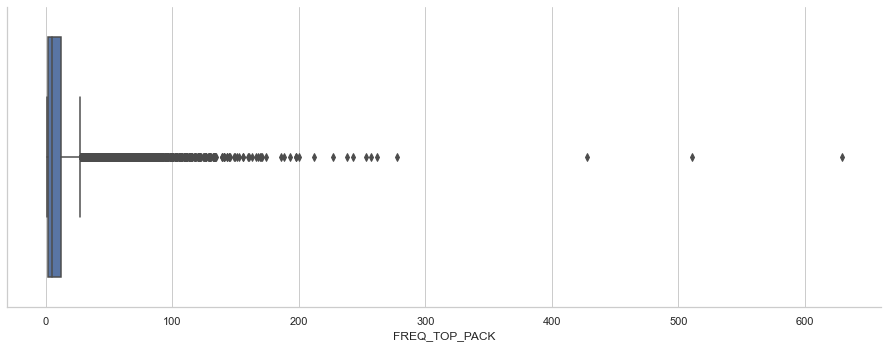

In [84]:
sns.catplot(data = df_ml, x = 'FREQ_TOP_PACK', kind = 'box', height = 5, aspect = 2.5)

In [85]:
df_ml['FREQ_TOP_PACK'] = (df_ml['FREQ_TOP_PACK'].min()) / (df_ml['FREQ_TOP_PACK'].max() - df_ml['FREQ_TOP_PACK'].min())

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/1556909665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['FREQ_TOP_PACK'] = (df_ml['FREQ_TOP_PACK'].min()) / (df_ml['FREQ_TOP_PACK'].max() - df_ml['FREQ_TOP_PACK'].min())


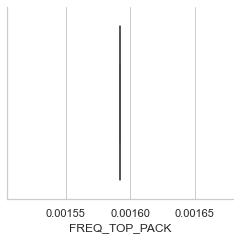

In [86]:
sns.catplot(data = df_ml, x = 'FREQ_TOP_PACK', kind = 'box', height = 3.5)

In [87]:
df_ml.drop(['REGION'], axis = 1, inplace = True)

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/532437176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.drop(['REGION'], axis = 1, inplace = True)


In [88]:
df_ml['TOP_PACK'] = df_ml['TOP_PACK'].fillna(method = 'bfill')

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/2943122423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['TOP_PACK'] = df_ml['TOP_PACK'].fillna(method = 'bfill')


In [89]:
df_ml.isnull().sum()

TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [90]:
df_ml['MRG'] = le.fit_transform(df_ml['MRG'])

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/1034607616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['MRG'] = le.fit_transform(df_ml['MRG'])


In [91]:
tenure = pd.get_dummies(df_ml['TENURE'], drop_first = False)

In [92]:
top = pd.get_dummies(df_ml['TOP_PACK'], drop_first = False)

In [93]:
df_ml.drop(['TENURE'], axis = 1, inplace = True)

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/48628198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.drop(['TENURE'], axis = 1, inplace = True)


In [94]:
df_ml.drop(['TOP_PACK'], axis = 1, inplace = True)

C:\Users\BEST\AppData\Local\Temp/ipykernel_5440/1919163936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml.drop(['TOP_PACK'], axis = 1, inplace = True)


In [95]:
df_ml = pd.concat([df_ml, tenure, top], axis = 1)
df_ml.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,MRG,...,VAS(IVR_Radio_Monthly),VAS(IVR_Radio_Weekly),WIFI_ Family _10MBPS,WIFI_ Family _4MBPS,WIFI_Family_2MBPS,"YMGX 100=1 hour FNF, 24H/1 month",Yewouleen_PKG,pack_chinguitel_24h,pilot_offer5,pilot_offer6
user_id,,,,,,,,,,,,,,,,,,,,,
dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,0.000088,0.240602,0.000004,0.0,0.373626,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
71c44b5ba328db5c4192a80f7cf8f244d9350ed0,0.000088,0.218045,0.000004,0.0,0.406593,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
ce46411b1526c94f20a383b8cb188f8d27f82a0a,0.000088,0.022556,0.000004,0.0,0.032967,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
f467cdb6669818373c26c2bad44e01ba66f97d21,0.000088,0.022556,0.000004,0.0,0.043956,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
ec45e1a1888a32b5dcce0954cfec20c6e037db31,0.000088,0.087931,0.000004,0.0,0.032967,0.0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258518 entries, dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063 to 767f596aee426962f7d92f4de8d7b232cdc17568
Columns: 132 entries, MONTANT to pilot_offer6
dtypes: float64(10), int32(1), int64(2), uint8(119)
memory usage: 56.0+ MB


In [97]:
df_ml.shape

(258518, 132)

# Correlation Table

In [98]:
df.corr()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
MONTANT,1.000000,0.800385,0.979041,0.979041,0.781164,0.308343,0.327857,0.667531,0.427289,0.350551,0.407973,0.524157,0.742406,-0.106229
FREQUENCE_RECH,0.800385,1.000000,0.807405,0.807405,0.956262,0.165226,0.402383,0.522649,0.348092,0.126573,0.160979,0.557178,0.866833,-0.123113
REVENUE,0.979041,0.807405,1.000000,1.000000,0.791627,0.312915,0.331850,0.670220,0.425376,0.355228,0.377622,0.534122,0.751785,-0.114822
ARPU_SEGMENT,0.979041,0.807405,1.000000,1.000000,0.791627,0.312915,0.331850,0.670220,0.425377,0.355228,0.377623,0.534120,0.751785,-0.114822
FREQUENCE,0.781164,0.956262,0.791627,0.791627,1.000000,0.181491,0.392656,0.475057,0.311898,0.113051,0.164952,0.591314,0.843150,-0.139685
DATA_VOLUME,0.308343,0.165226,0.312915,0.312915,0.181491,1.000000,-0.014683,0.066746,0.029573,0.034982,0.054873,0.198813,0.126535,-0.036015
ON_NET,0.327857,0.402383,0.331850,0.331850,0.392656,-0.014683,1.000000,0.218051,0.138315,0.010337,-0.018135,0.268487,0.351834,-0.057701
ORANGE,0.667531,0.522649,0.670220,0.670220,0.475057,0.066746,0.218051,1.000000,0.408712,0.042190,0.016740,0.310284,0.557338,-0.063382
TIGO,0.427289,0.348092,0.425376,0.425377,0.311898,0.029573,0.138315,0.408712,1.000000,0.006882,0.015626,0.197842,0.375953,-0.035890
ZONE1,0.350551,0.126573,0.355228,0.355228,0.113051,0.034982,0.010337,0.042190,0.006882,1.000000,0.041978,0.042619,0.187581,0.019937


# Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df_ml.drop(columns=['CHURN'])
y = df_ml['CHURN']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

score = accuracy_score(y_test, predictions)
score

0.9413585022435401

# Model Training

In [100]:
x = df_ml.drop(columns=['CHURN'])
y = df_ml['CHURN']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split (x,y,test_size=1/3, random_state = 0)

# Linear Regression Model

In [101]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [102]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 20000)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [103]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc= (fpr, tpr)

Accuracy:  0.9554268738467966
Precision:  0.5357142857142857
Recall:  0.0039032006245121


# CatBoost 

In [104]:
from catboost import Pool, CatBoostClassifier

catboost = CatBoostClassifier(iterations = 10)
cat = catboost.fit( x_train, y_train)
y_pred = cat.predict(x_test)

Learning rate set to 0.5
0:	learn: 0.2152424	total: 609ms	remaining: 5.48s
1:	learn: 0.1590538	total: 728ms	remaining: 2.91s
2:	learn: 0.1493763	total: 791ms	remaining: 1.84s
3:	learn: 0.1463424	total: 847ms	remaining: 1.27s
4:	learn: 0.1441710	total: 900ms	remaining: 900ms
5:	learn: 0.1437543	total: 959ms	remaining: 640ms
6:	learn: 0.1432465	total: 1.02s	remaining: 438ms
7:	learn: 0.1425561	total: 1.09s	remaining: 272ms
8:	learn: 0.1422761	total: 1.15s	remaining: 128ms
9:	learn: 0.1421415	total: 1.21s	remaining: 0us


In [105]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.9556937787938218
Precision:  0.5420875420875421
Recall:  0.04189435336976321


# Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [107]:
y_pred = classifier.predict(x_test)

In [108]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.9490791779327632
Precision:  0.2807723250201126
Recall:  0.09081446786364819


# XGBoost 

In [109]:
import xgboost as xgb
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgb = xgboost.fit( x_train, y_train)
y_pred = xgb.predict(x_test)

In [110]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred, normalize = True))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.9552528054030844
Precision:  0.48519362186788156
Recall:  0.05542544886807182
